In [1]:
import pandas as pd
import ast
import re
import time
import numpy as np

from konlpy.tag import Kkma, Okt, Hannanum
import gensim

C:\Users\limaries30\.conda\envs\python3.6\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [5]:
class sampling_by_length:
    def __init__(self,sent,n=10):
        self.sent=sent
        self.len_sent=n
    
#     def random_sample(self):
#         first=np.random.randint(1,len(self.sent),1)[0]
#         second=np.random.randint(1,len(self.sent[first-1]),1)[0]
#         return self.sent[first-1][second-1]
    
    def sort_by_length(self):  #문장 length순으로 sorting
        x=self.sample_sentences()
        x.sort(key=lambda s:len(s))
        lengthes=list(map(lambda x:len(x),x))
        return list(zip(x,lengthes))

    def sample_sentences(self):
        sample_sentences=[]
        numbers=np.random.randint(1,len(self.sent),self.len_sent)
        for i in numbers:
            sample_sentences.append(self.sent[i-1])
        return sample_sentences

def tokenizing_time_by_len(x,tokenizer):
    len_time=[]
    for i in x:
        #tokenizer=tokenizer
        start_time=time.time()
        try:
            tokenizer.pos(i[0].encode('utf-8'))
        except:
            print(i[0])
            continue
        end_time=time.time()
        time_taken=end_time-start_time
        len_time.append((i[1],time_taken))
    return len_time


def preprocessing(data):
    lecture_sentences=list(map(lambda x:ast.literal_eval(x),data))
    lecture_sentences=list(filter(lambda x:(len(x)!=0 and len(x)!=1),lecture_sentences)) #강의평이 없가나 1개 밖에 없는 경우 날림
    lecture_sentences=[i for e in lecture_sentences for i in e]
    return lecture_sentences

In [6]:
my_data=pd.read_csv(r'../data/raw/2017_1.csv')
lecture_sentences=preprocessing(my_data.LectureEval.values)
# lecture_sentences=list(map(lambda x:p.findall(x),lecture_sentences))
# lecture_sentences=[i for e in lecture_sentences for i in e]
sampling_sent=sampling_by_length(lecture_sentences,1000)
test_set=sampling_sent.sort_by_length()

In [5]:
set_tokenizer=[('kkma',Kkma()),('okt',Okt()),('Hannanum',Hannanum())]
performance={}
for i in set_tokenizer:
    performance[i[0]]=tokenizing_time_by_len(test_set,i[1])

C:\ProgramData\Anaconda3\lib\site-packages\jpype\_core.py:210: UserWarning: 
-------------------------------------------------------------------------------
Deprecated: convertStrings was not specified when starting the JVM. The default
behavior in JPype will be False starting in JPype 0.8. The recommended setting
for new code is convertStrings=False.  The legacy value of True was assumed for
this session. If you are a user of an application that reported this warning,
please file a ticket with the developer.
-------------------------------------------------------------------------------

  """)


[Text(0, 0.5, 'Time'), Text(0.5, 0, 'length of sentence')]

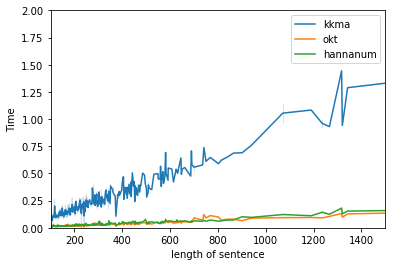

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots()
sns.lineplot(*zip(*performance['kkma']),label='kkma')
sns.lineplot(*zip(*performance['okt']),label='okt')
sns.lineplot(*zip(*performance['Hannanum']),label='hannanum')
ax.set_xlim(100,1500)
ax.set_ylim(0,2)
ax.set(xlabel='length of sentence', ylabel='Time')

## TODO

- sample sentece 메소드 class 로 정리하기

In [50]:
# a=[]
# for i in trial[0]:
#     a.append(i.split(' '))
# model = gensim.models.Word2Vec(min_count=1)
# model.build_vocab(a)
# model.train(a,total_examples=model.corpus_count,epochs=1)

(155, 227)